<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/exercise_dragons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: 🐉 Dragon Data: Clustering and Dimensionality Reduction Exercise

In this exercise, you will explore a synthetic dataset of `dragons`, each described by features such as fire power, wing span, scale thickness, hoard size, age, color, and region. Using this data, you will learn and apply several key data science techniques:

- **Principal Component Analysis (PCA):** Reduce the dimensionality of the data and visualize the main axes of variation among dragons.
- **t-Distributed Stochastic Neighbor Embedding (t-SNE):** Visualize complex, high-dimensional relationships in two dimensions.
- **KMeans Clustering:** Group dragons into clusters based on their features and explore the resulting groupings.
- **Hierarchical Clustering:** Build a dendrogram to visualize how dragons can be grouped at different levels of similarity.
- **Heatmaps:** Visualize the standardized features of dragons to spot patterns and differences.

This hands-on activity will help you understand how these techniques can reveal structure and patterns in complex datasets—even fantastical ones!

![A fun dragon drawn using DALL-E](https://github.com/neelsoumya/python_machine_learning/raw/main/images/dragons.png)

## Load packages

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Generate Synthetic Dragon Data

In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dragon data
n_dragons = 100
dragon_data = pd.DataFrame({
    'fire_power': np.random.normal(70, 15, n_dragons),
    'wing_span': np.random.normal(15, 4, n_dragons),
    'scale_thickness': np.random.normal(5, 2, n_dragons),
    'hoard_size': np.random.exponential(300, n_dragons),
    'age': np.random.randint(1, 500, n_dragons),
    'color': np.random.choice(['Red', 'Green', 'Blue', 'Black', 'White'], n_dragons),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_dragons)
})

dragon_data.head()

,fire_power,wing_span,scale_thickness,hoard_size,age,color,region
0,77.450712,9.338517,5.715575,99.400159,441,Red,West
1,67.926035,13.317419,6.121569,58.599989,459,Red,North
2,79.715328,13.629142,7.166102,416.626919,12,Blue,West
3,92.845448,11.790891,7.107604,493.262755,330,White,North
4,66.487699,14.354857,2.244661,1397.101467,224,White,East


## Encode Categorical Variables

In [30]:
# Convert categorical variables to dummy/indicator variables
dragon_data_encoded = pd.get_dummies(dragon_data, columns=['color', 'region'])
dragon_data_encoded.head()

,fire_power,wing_span,scale_thickness,hoard_size,age,color_Black,color_Blue,color_Green,color_Red,color_White,region_East,region_North,region_South,region_West
0,77.450712,9.338517,5.715575,99.400159,441,False,False,False,True,False,False,False,False,True
1,67.926035,13.317419,6.121569,58.599989,459,False,False,False,True,False,False,True,False,False
2,79.715328,13.629142,7.166102,416.626919,12,False,True,False,False,False,False,False,False,True
3,92.845448,11.790891,7.107604,493.262755,330,False,False,False,False,True,False,True,False,False
4,66.487699,14.354857,2.244661,1397.101467,224,False,False,False,False,True,True,False,False,False


## Standardize Features

In [31]:
# Standardize all features for clustering and dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dragon_data_encoded)

## Perform PCA

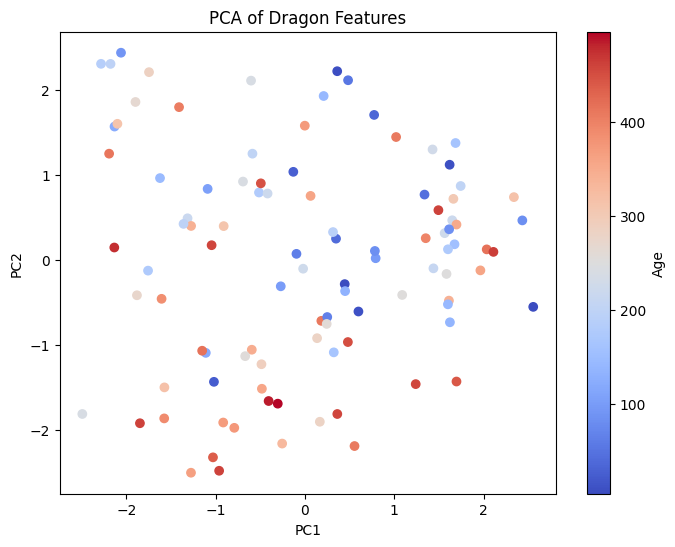

In [32]:
# Run PCA and add the first two principal components to the original data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
dragon_data['PC1'] = X_pca[:, 0]
dragon_data['PC2'] = X_pca[:, 1]

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(dragon_data['PC1'], dragon_data['PC2'], c=dragon_data['age'], cmap='coolwarm')
plt.colorbar(label='Age')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Dragon Features')
plt.show()

## tSNE

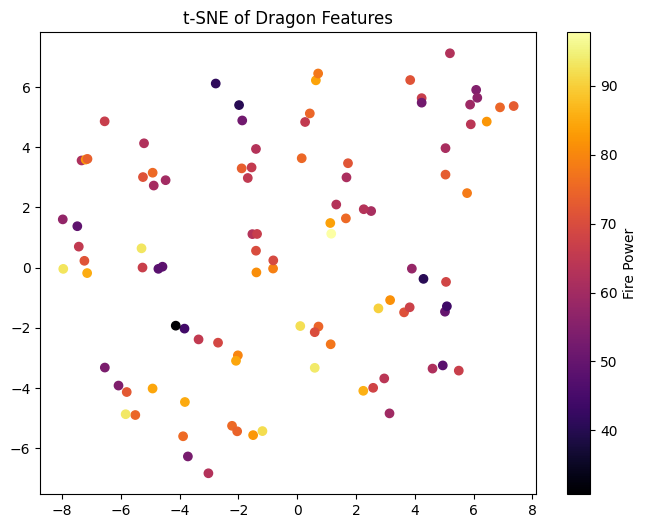

In [33]:
# Run t-SNE and add results to the data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
dragon_data['TSNE1'] = X_tsne[:, 0]
dragon_data['TSNE2'] = X_tsne[:, 1]

# Plot t-SNE results
plt.figure(figsize=(8,6))
plt.scatter(dragon_data['TSNE1'], dragon_data['TSNE2'], c=dragon_data['fire_power'], cmap='inferno')
plt.colorbar(label='Fire Power')
plt.title('t-SNE of Dragon Features')
plt.show()

## k-means

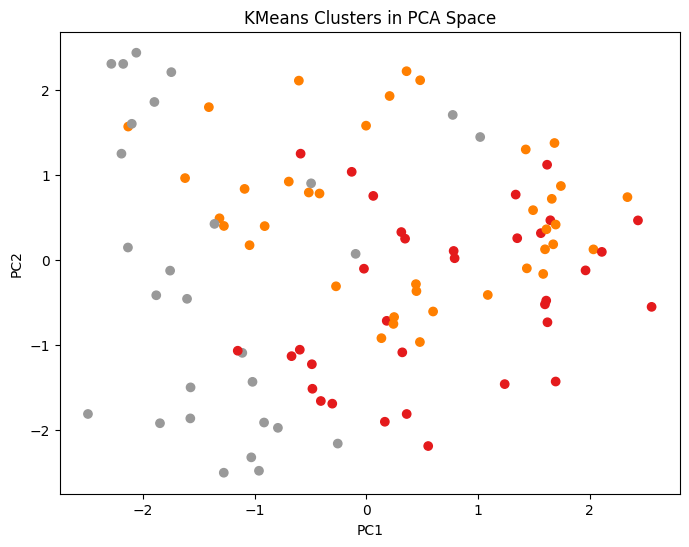

In [34]:
# Run KMeans clustering and add cluster labels to the data
kmeans = KMeans(n_clusters=3, random_state=42)
dragon_data['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters in PCA space
plt.figure(figsize=(8,6))
plt.scatter(dragon_data['PC1'], dragon_data['PC2'], c=dragon_data['kmeans_cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters in PCA Space')
plt.show()

## Hierarchical clustering

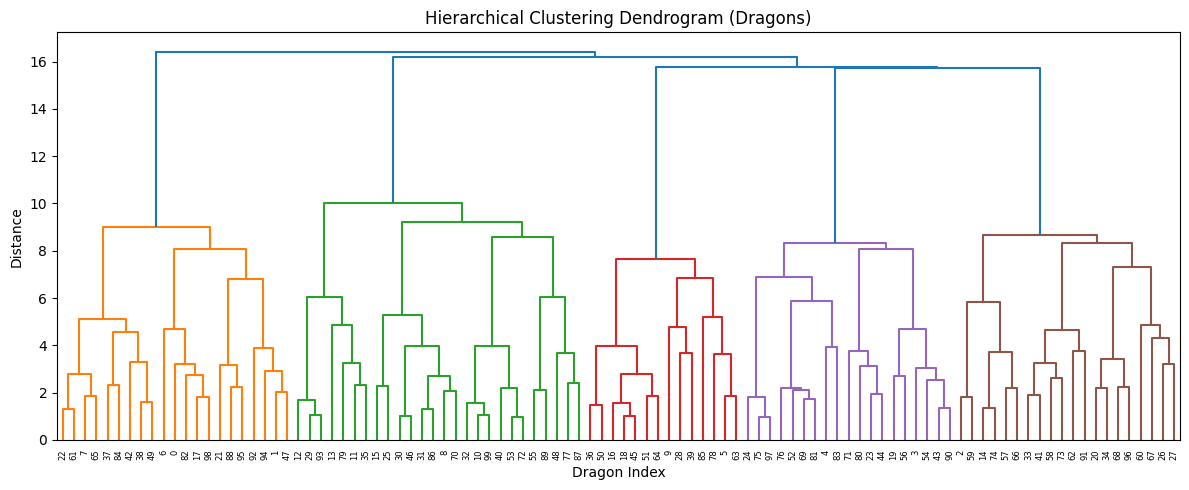

In [35]:
# Run hierarchical clustering and plot dendrogram
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram (Dragons)')
plt.xlabel('Dragon Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Heatmaps of standardized features

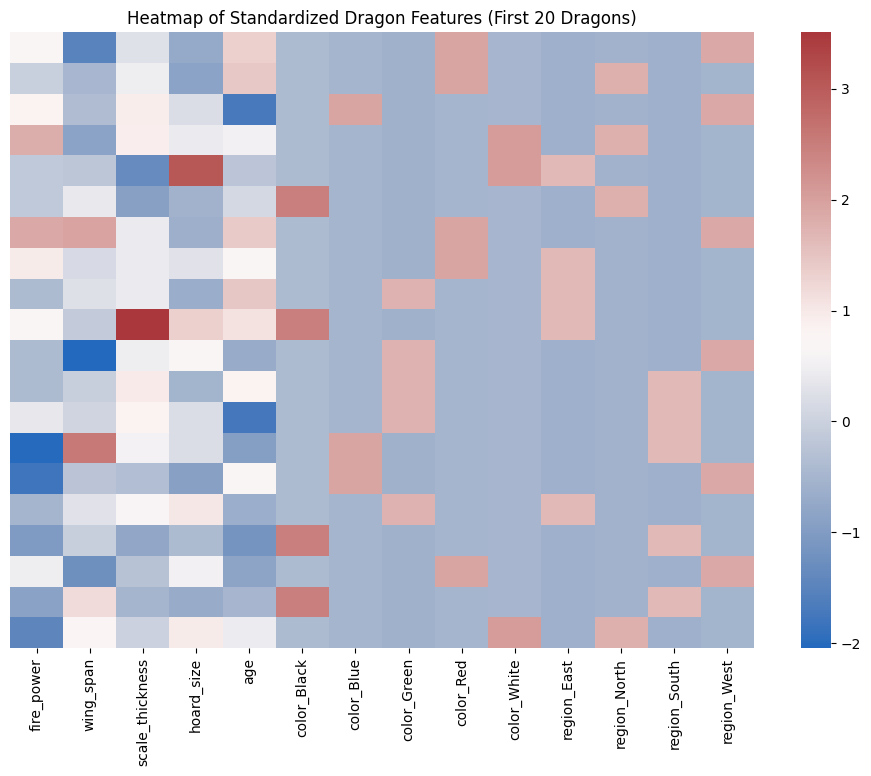

In [36]:
# Show a heatmap of the first 20 dragons' standardized features
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_scaled, columns=dragon_data_encoded.columns).iloc[:20], cmap='vlag', yticklabels=False)
plt.title('Heatmap of Standardized Dragon Features (First 20 Dragons)')
plt.show()

## References

[1] https://en.wikipedia.org/wiki/Dragon

[2] https://www.sciencefocus.com/nature/are-dragons-real